# 여러 지수평활법과 ETS 비교 실습

여태까지 이동평균평활 이후 우리가 배웠던 지수평활법은 **단순지수평활법(simple exponential smoothing)**과 **홀트의선형지수평활법(holt's linear trend method)**와 **홀트의계절지수평활법(holt winters' seasonal method)**가 있었습니다.<br/>
각각을 통계적 기법을 적용한 **ETS 모형**과 비교해보는 실습을 진행합니다.<br/>

ETS는 앞서 배웠던 분해분석 위주의 고전모형들과는 다르게 확률적 방법의 시간영역의 한 모형으로 분류됩니다.<br/>

실습에 주어진 조건은 아래와 같습니다.<br/>
* holt의 감쇠효과 또는 hw에서 가법/승법 선택은 분석자가 각자 판단해서 사용 가능
* RMSE 값을 기준으로 더 나은 모형을 분석
* 실제값과 적합된 값 구분하여 차트로 표현하기

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"



Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = oil_data, h = 12) 

  Smoothing parameters:
    alpha = 0.8339 

  Initial states:
    l = 446.5868 

  sigma:  29.8282

     AIC     AICc      BIC 
178.1430 179.8573 180.8141 

Error measures:
                   ME     RMSE     MAE      MPE     MAPE      MASE        ACF1
Training set 6.401975 28.12234 22.2587 1.097574 4.610635 0.9256774 -0.03377748

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014       542.6806 504.4541 580.9070 484.2183 601.1429
2015       542.6806 492.9073 592.4539 466.5589 618.8023
2016       542.6806 483.5747 601.7864 452.2860 633.0752
2017       542.6806 475.5269 609.8343 439.9778 645.3834
2018       542.6806 468.3452 617.0159 428.9945 656.3667
2019       542.6806 461.7988 623.5624 418.9826 666.3786
2020       542.6806 455.7439 629.6173 409.7224 675.6388
2021       542.6806 450.0841 635.2771 401.0665 684.2947
2022       542.6806

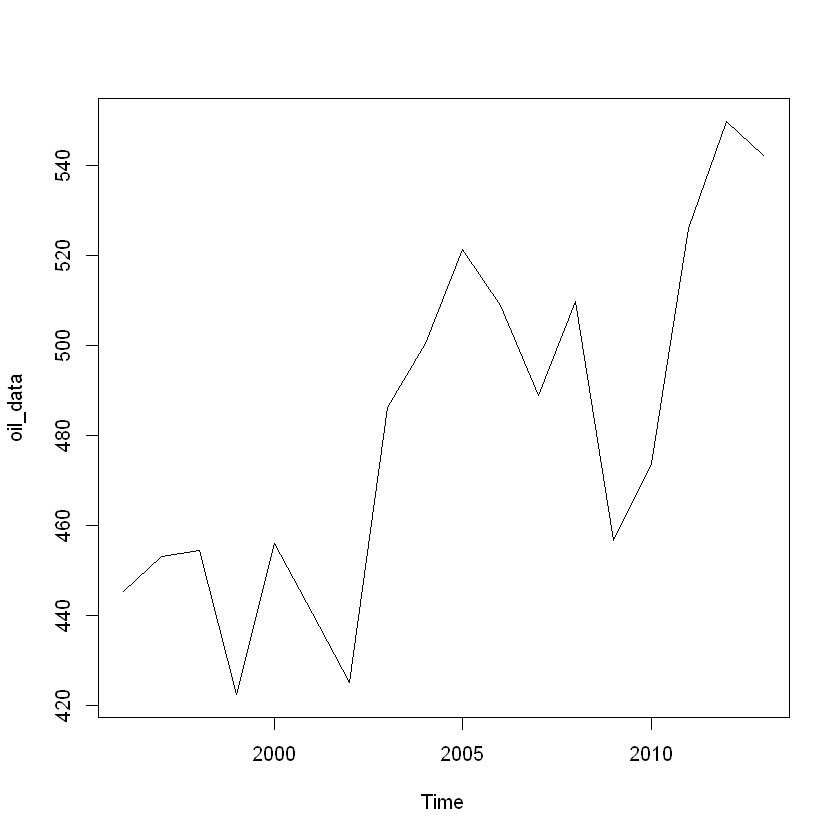

ETS(A,N,N) 

Call:
 ets(y = oil_data) 

  Smoothing parameters:
    alpha = 0.8338 

  Initial states:
    l = 446.5581 

  sigma:  29.8282

     AIC     AICc      BIC 
178.1430 179.8573 180.8141 

Training set error measures:
                   ME     RMSE      MAE      MPE    MAPE     MASE        ACF1
Training set 6.404621 28.12234 22.25701 1.098136 4.61025 0.925607 -0.03370615


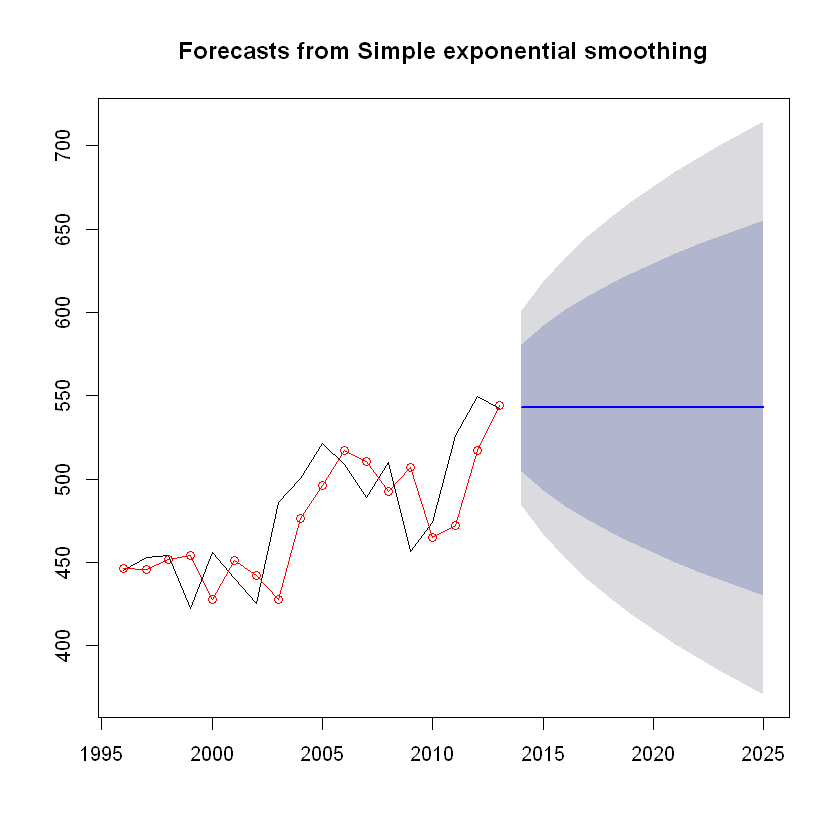

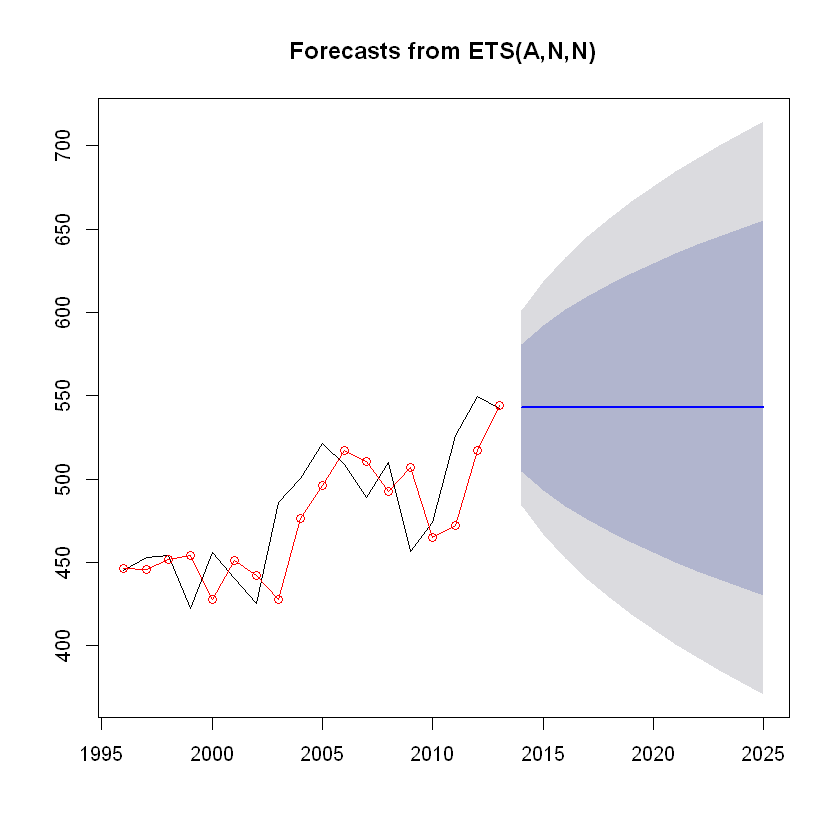

In [1]:
library(forecast)
library(fpp2)

# data for ses() vs ets()
oil_data <- window(oil, start=1996)
# check original data
plot(oil_data)

# apply ses
ses_oildata <- ses(oil_data, h = 12)
summary(ses_oildata)
plot(ses_oildata)
lines(fitted(ses_oildata), type="o", col="red")

# apply ets
fit_oildata <- ets(oil_data)
summary(fit_oildata)
plot(forecast(fit_oildata, h = 12))
lines(fitted(fit_oildata), type="o", col="red")

우선 가장 먼저 저는 ETS의 인수를 ZZZ로 두었습니다. ETS의 세 인수는 순서대로 error, trend, seasonal term에 각각 해당합니다.<br/>
제가 이렇게 자동으로 최적 모형을 찾아주는 ZZZ로 둔 이유는 이렇습니다.<br/>

이 실습에서 이용하는 데이터들이 전부 해당 단원을 배울 때 "이런 데이터"에는 "이 모형이 적합하다"하고 배울 때 써먹었던 데이터들이기 때문에, 이 첫 번째 데이터인 oil의 경우 ses가 적합할 것 입니다.<br/>
실제로도 최적의 모형이 맞을지 확인해보기 위해서 <br/>일부러 자동으로 두었습니다.<br/>

window()함수를 이용해서 원하는 구간인 1996년부터~만큼만 적합시키도록 합니다.<br/>
그리고 어떤 모형으로든 적합시키기 이전에 원본 데이터를 가장 먼저 찍어보았습니다.<br/>

단순지수 평활법은 시계열 관측값들에 대한 전체적 가중평균인 평활값으로 미래의 관측값을 예측합니다. 단순이동평균법과는 달리 최근 자료에 더 많은 가중값을 부여하는 방식으로 0~1사이의 값을 갖는 **알파**라는 평활상수에 의해 지수적으로 과거로 갈수록 그 값이 미미해지게 되는 모형이었죠.<br/>

우리는 지난 실습을 통해 알파값이 커질수록 원본데이터와 점점 비슷해지며 잔차값이 줄어드는 것을 알 수 있었습니다.<br/>

(알파값이 클수록 잔차값이 줄어드는 이유 ? '우상향 추세때의 상승상세나 골드크로스 이후의 하락상세의 폭이 크지 않기 때문에')<br/>

그리고 알파값이 1이 되는 경우엔 정확하게 한칸 밀어놓은 것처럼 생겼을 것입니다. ses 모형의 수식 전개를 보면 이 말을 정확하게 이해하실 수 있을테구요.<br/>

현재 ses 모형의 초기값과 알파값은 최적으로 찾도록 설정하고 호출하였기 때문에 확인해줄 필요가 있습니다. 적합시킨 모형을 요약해보면 각각 초기값이  446.5868, 알파값이 0.8339로 확인됩니다.<br/>

ses 모형의 RMSE 값은 28.12234로 확인되었습니다.<br/>

이후 ETS 모형으로 적합시키는데, 위에서 설명했듯이 최적값을 자동으로 찾도록 호출하였지요.<br/>
놀랍게도 (어쩌면 예상한 것처럼ㅎㅎ) ANN모델이 확인되었네요, ses 모델에 에러텀만 additive하게 설정된 모형으로 적합시킨 것입니다!<br/>

심지어는 주관적이기는 하나 알파값(0.8338)과 초기값(446.5581)도 크게 차이가 안나요! 에러텀이 들어갔으니 아예 차이가 안날 수는 없겠지요.<br/>

참고로 ANN과 MNN 모형 비교를 위해서 스무딩파라미터 값이 동일하게준다면 RMSE값이 동일하게 나옵니다.<br/>
왜냐면 y를 정의하는 수식을 보면 알 수 있습니다. 에러텀이 승법이든 가법이든 간에 수식에서 익스펙테이션을 (분배)를 해보면 똑같아지기 때문에 RMSE 값이 같은 겁니다.<br/>
평균이 0이니까 확률변수가 0값으로 곱해져버리니까 동일한모형으로 되어버립니다. 그래서 테스트를 해서 확인해보려했는데, alpha값은 지정해줄 수 있었지만, initial value도 지정해주려고하니까 잘 되지않아서 내용을 싣지를 못했습니다.<br/>
이 내용과 관련된 추가 실습 링크를 [여기](https://github.com/ohjinjin/TimeSeries_Lab/blob/master/compare_ses_vs_ets_via_same_parameter.ipynb)에 걸어두겠습니다.<br/>

ETS 모형의 RMSE값은28.12234입니다.<br/>
ses모형으로 적합시켰을 때나 ets 모형으로 적합시켰을 때의 결과가 거의 대동소이하다는 것을 알 수 있습니다.<br/>
그럼에도 불구하고 하나만 고르라면 아무래도 진화된 모형이니까 ets이지 않을까...하지만 정량적인 평가를 위해서 아래 또 다른 실습을 준비해보았습니다.<br/>

이런 경우는 예측력도 함께 테스트 해보면 좋겠습니다.<br/>

* 예측데이터와 적합데이터 구분하여 실습하는 링크 : [https://github.com/ohjinjin/TimeSeries_Lab/blob/master/comparing_all_of_exponential_smoothing_method_wih_ets_2.ipynb](https://github.com/ohjinjin/TimeSeries_Lab/blob/master/comparing_all_of_exponential_smoothing_method_wih_ets_2.ipynb)<br/>


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = ausair_data, h = 12) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

Error measures:
                      ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.008359331 2.182343 1.52892 -0.3244107 3.820787 0.6654839
                    ACF1
Training set -0.01335362

Forecasts:
     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.60130 71.57106  77.63154 69.96695  79.23566
2018       76.70304 72.76440  80.64169 70.67941  82.72668
2019       78.80478 74.13092  83.47864 71.65673  85.95284
2020       80.90652 75.59817  86.21487 72.78810  89.02494
2021       83.00826 77.13343  88.88310 74.02348  91.99305
2022       85.11000 78.71857  91.50143 75.33516  94.88485
2023       87.21174 80.34235  94.08113 76.70591  97.71757
2024       89.31

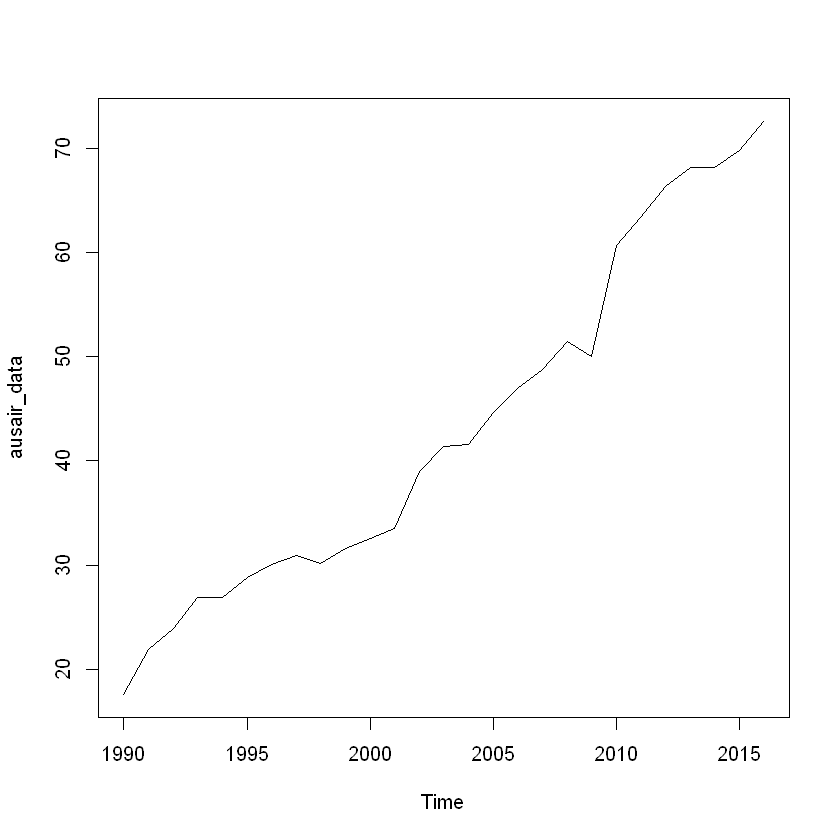


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = ausair_data, h = 12, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.8691 
    beta  = 0.0409 
    phi   = 0.98 

  Initial states:
    l = 15.373 
    b = 2.2224 

  sigma:  2.532

     AIC     AICc      BIC 
145.6239 149.8239 153.3989 

Error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.3991511 2.285529 1.529037 0.560457 3.672339 0.6655348
                    ACF1
Training set -0.03143013

Forecasts:
     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.10429 70.85945  77.34913 69.14174  79.06685
2018       75.72699 71.34160  80.11238 69.02012  82.43386
2019       77.31724 71.95975  82.67472 69.12367  85.51081
2020       78.87568 72.63402  85.11733 69.32989  88.42147
2021       80.40295 73.33096  87.47494 69.58727  91.21862
2022       81.89967 74.03329  89.76606 69.86907  93.93028
2023       83.36647 74.73101  92.0

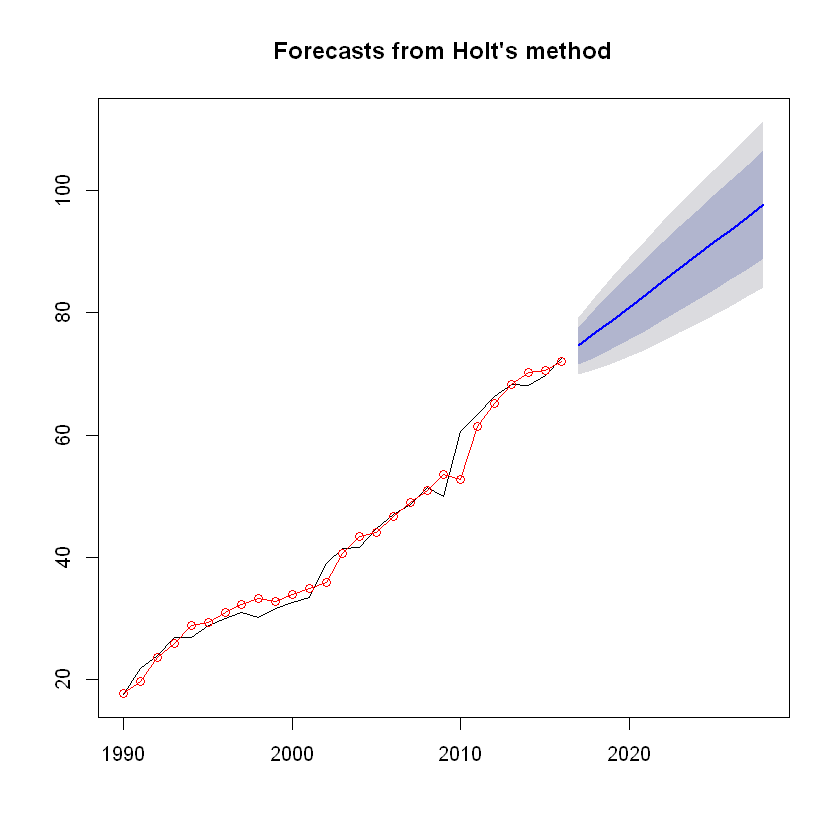

ETS(M,A,N) 

Call:
 ets(y = ausair_data) 

  Smoothing parameters:
    alpha = 0.8356 
    beta  = 1e-04 

  Initial states:
    l = 16.1057 
    b = 2.0994 

  sigma:  0.0571

     AIC     AICc      BIC 
139.5747 142.4319 146.0539 

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01242452 2.182641 1.541071 -0.4451094 3.904974 0.6707726
                    ACF1
Training set -0.02819235


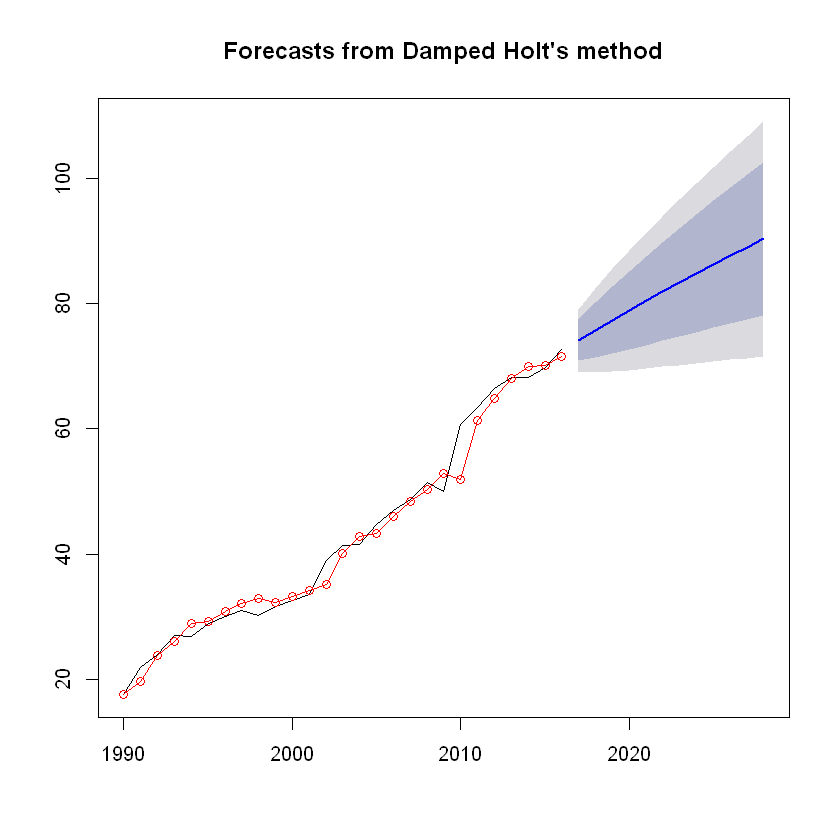

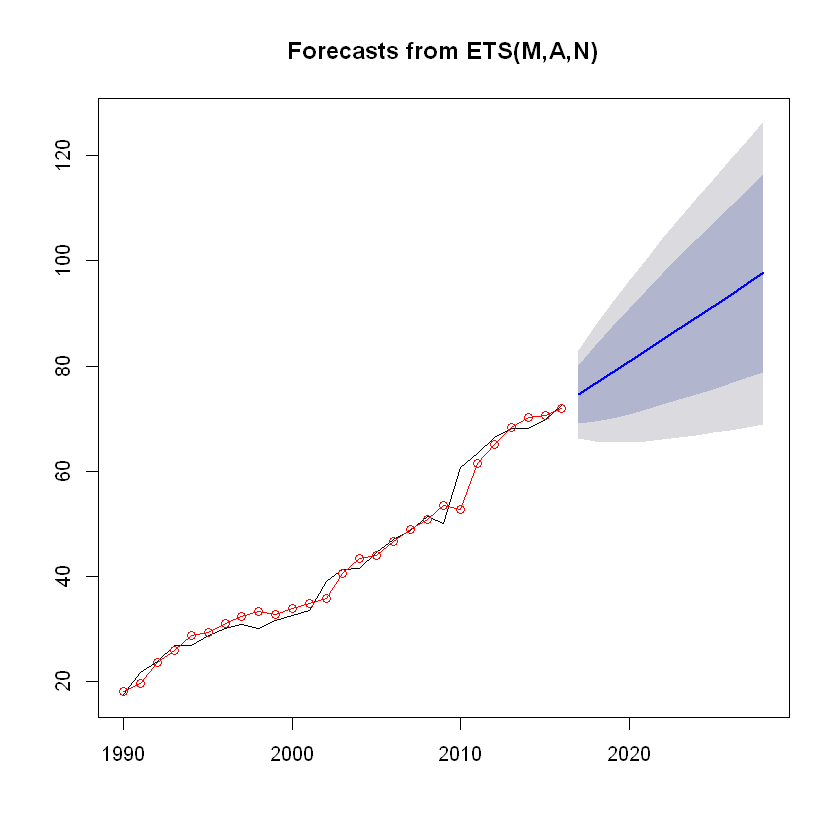

In [2]:
# data for holt() vs ets()
ausair_data <- window(ausair, start=1990)
# check original data
plot(ausair_data)

# apply holt_no damped
ausair_holt_1 <- holt(ausair_data, h = 12)
summary(ausair_holt_1)
plot(ausair_holt_1)
lines(fitted(ausair_holt_1), type="o", col="red")

# apply holt_ damped
ausair_holt_2 <- holt(ausair_data, h = 12, damped=TRUE)
summary(ausair_holt_2)
plot(ausair_holt_2)
lines(fitted(ausair_holt_2), type="o", col="red")

# apply ets
ausair_ets <- ets(ausair_data)
summary(ausair_ets)
plot(forecast(ausair_ets, h = 12))

lines(fitted(ausair_ets), type="o", col="red")

이번엔 홀트의 선형지수 평활과 ets 두 메소드 간의 비교 실습입니다.<br/>
마찬가지의 이유로 ETS의 인수를 ZZZ로 두었습니다.<br/>

window()함수를 이용해서 원하는 구간인 1990년부터~만큼만 적합시키도록 합니다.<br/>
그리고 어떤 모형으로든 적합시키기 이전에 원본 데이터를 가장 먼저 찍어보았습니다.<br/>

아주 잔잔하고 추세나 계절성이 없는 데이터들에 활용하는 단순지수평활법과 달리 홀트의 선형지수평활법은 추세가 있는 데이터를 예측할 수 있도록 단순 지수 평활을 확장한 모형이며, 두개의 평활식(수준에 관한 것, 추세에 관한 것)으로 이루어집니다.<br/>
수준식은 관측값의 가중 평균(=자료의 평활)이며, 추세에 관한 식은 말 그대로 추정된 추세의 이동 평균(=추세의 평활)입니다.<br/>
예측 함수는 더이상 평평하지 않고, 추세를 가집니다.<br/>

다만 상승추세였다해도 미래의 데이터가 지속적으로 지금의 속도로 가파르게 상승하기만 할거라는 보장이 없습니다.<br/>
그러다보면 적합된 추세에 너무 맞추다보니 오히려 과하게 예측할 수 있기에 파라미터 phi를 이용한 조정을 통해 그러한 문제를 방지하는 기법입니다.<br/>
다시 말해 상승(또는 하강)을 하기는 하되 점점 감쇠하며 상승(또는 하강)하도록 설정해주는 것이라고 이해하시면 편합니다. 그래서 damped라는 감쇠 추세법 설정을 위한 파라미터를 두었는데요,<br/>
보통 도메인 지식이 어느정도 있을 때 damped를 true or false 둘중 하나를 고르게 되는데, 잘 모르는 분야의 경우는 둘 다 적용하는 것이 보다 바람직합니다.<br/>
그래서 둘 다 적용해보았습니다.<br/>

cf) phi : 감쇠 지수 매개변수로 phi=1이면 holt의 선형기법과 동일한 결과를 낳습니다. default는 0.98입니다.<br/>

적합된 홀트 선형지수평활 모형(no damped)을 요약해보았습니다. 앞서 말했던 자료 평활과 추세 평활과 관련하여 초기값과 알파베타값을 확인할 수 있습니다. 또한 이 모형의 RMSE 값은 2.182343으로 확인되었습니다.<br/>

그 다음 적합된 홀트 선형지수평활 모형(damped) 역시 요약해보았습니다. RMSE값은 2.285529로 잔차값이 조금 늘었네요. 적합시킬 구간은 거의 단순하게 지속적으로 상승하는 구간이다 보니까 잔차가 늘어보일 수 있을 듯합니다.<br/>

이후 ETS 모형으로 적합시키는데, 위에서 설명했듯이 최적값을 자동으로 찾도록 호출하였지요.<br/>
이번에도 역시 MAN모델이 확인되었네요, 홀트 선형 모형에 에러텀만 multiplicative하게 설정된 모형으로 적합시킨 것입니다!<br/>

ETS 모형의 RMSE값은2.182641입니다.<br/>
RMSE값만 보아서는 에러텀이 없는 홀트 선형지수 모형(no damped)이 가장 잘 적합된 것이라고 판단할 수는 있겠지만, 과적합 문제를 피해갈 수 있을지 여부까지 확인을 위해서 아래 또 다른 실습을 준비해보았습니다.<br/>

좋은 모형을 찾기 위해서는 적합 잔차 뿐만 아니라 예측력도 함께 테스트 해보는 것이 훨씬 좋겠습니다.<br/>

* 예측데이터와 적합데이터 구분하여 실습하는 링크 : [https://github.com/ohjinjin/TimeSeries_Lab/blob/master/comparing_all_of_exponential_smoothing_method_wih_ets_2.ipynb](https://github.com/ohjinjin/TimeSeries_Lab/blob/master/comparing_all_of_exponential_smoothing_method_wih_ets_2.ipynb)<br/>


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = austourists_data, h = 8, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.3063 
    beta  = 1e-04 
    gamma = 0.4263 

  Initial states:
    l = 32.2597 
    b = 0.7014 
    s = 1.3106 -1.6935 -9.3132 9.6962

  sigma:  1.9494

     AIC     AICc      BIC 
234.4171 239.7112 250.4748 

Error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.008115785 1.763305 1.374062 -0.2860248 2.973922 0.4502579
                    ACF1
Training set -0.06272507

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       76.09837 73.60011 78.59664 72.27761 79.91914
2016 Q2       51.60333 48.99039 54.21626 47.60718 55.59947
2016 Q3       63.96867 61.24582 66.69153 59.80443 68.13292
2016 Q4       68.37170 65.54313 71.20027 64.04578 72.69762
2017 Q1       78.90404 75.53440 82.27369 73.75061 84.05747
2017 Q2  

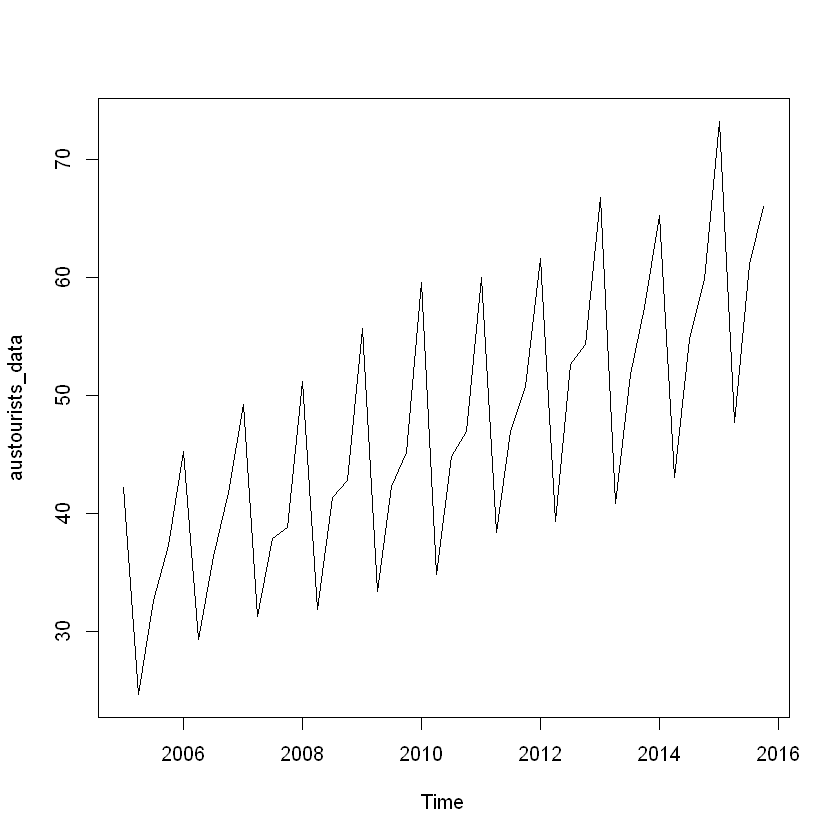


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = austourists_data, h = 8, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4406 
    beta  = 0.0134 
    gamma = 0.0023 

  Initial states:
    l = 32.4875 
    b = 0.6974 
    s = 1.0237 0.9618 0.7704 1.2442

  sigma:  0.0367

     AIC     AICc      BIC 
221.1313 226.4254 237.1890 

Error measures:
                     ME     RMSE     MAE           MPE    MAPE      MASE
Training set 0.09206228 1.575631 1.25496 -0.0006505533 2.70539 0.4112302
                    ACF1
Training set -0.07955726

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       80.08894 76.31865 83.85922 74.32278 85.85509
2016 Q2       50.15482 47.56655 52.74309 46.19640 54.11324
2016 Q3       63.34322 59.80143 66.88502 57.92652 68.75993
2016 Q4       68.17810 64.08399 72.27221 61.91670 74.43950
2017 Q1       83.80112 78.43079 89.17146 75.58790 9

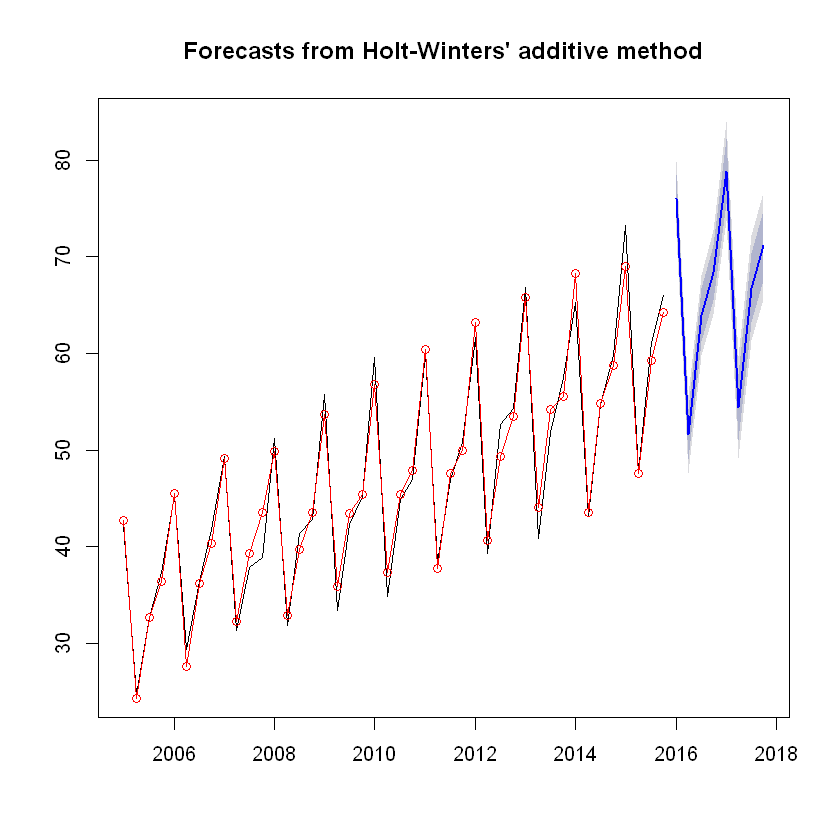

ETS(M,A,M) 

Call:
 ets(y = austourists_data) 

  Smoothing parameters:
    alpha = 0.1908 
    beta  = 0.0392 
    gamma = 2e-04 

  Initial states:
    l = 32.3679 
    b = 0.9281 
    s = 1.0218 0.9628 0.7683 1.2471

  sigma:  0.0383

     AIC     AICc      BIC 
224.8628 230.1569 240.9205 

Training set error measures:
                     ME     RMSE     MAE        MPE     MAPE     MASE      ACF1
Training set 0.04836907 1.670893 1.24954 -0.1845609 2.692849 0.409454 0.2005962


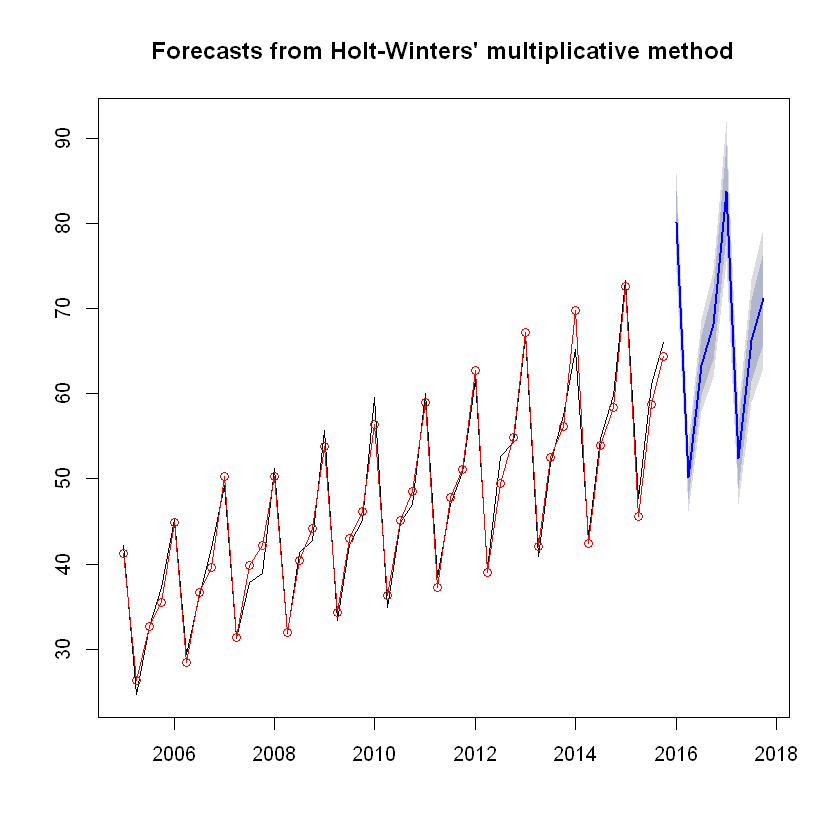

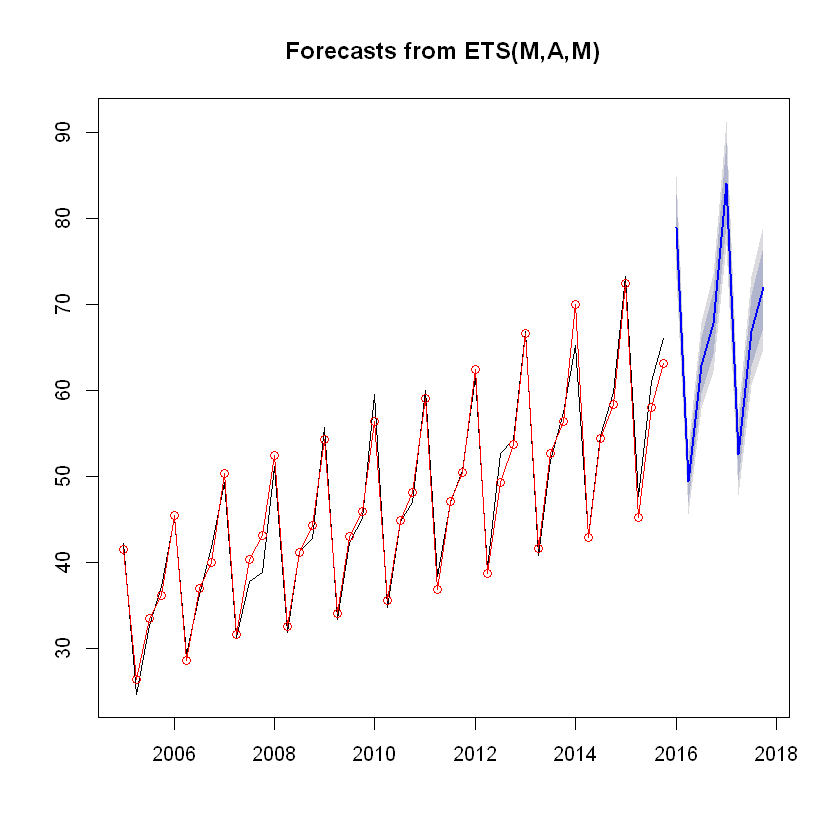

In [3]:
# data for hw() vs ets()
austourists_data <- window(austourists, start=2005)
# check original data
plot(austourists_data)

# apply holt winters' additive method
austourists_hw_add <- hw(austourists_data, seasonal="additive", h=8)
summary(austourists_hw_add)
plot(austourists_hw_add)
lines(fitted(austourists_hw_add), type="o", col="red")

# apply holt winters' multiplicative method
austourists_hw_multi <- hw(austourists_data, seasonal="multiplicative", h=8)
summary(austourists_hw_multi)
plot(austourists_hw_multi)
lines(fitted(austourists_hw_multi), type="o", col="red")

# apply ets
austourists_ets <- ets(austourists_data)
summary(austourists_ets)
plot(forecast(austourists_ets, h = 8))
lines(fitted(austourists_ets), type="o", col="red")


이번엔 홀트의 계절지수 평활과 ets 두 메소드 간의 비교 실습입니다.
마찬가지의 이유로 ETS의 인수를 ZZZ로 두었습니다.

window()함수를 이용해서 원하는 구간인 2005년부터~만큼만 적합시키도록 합니다.<br/>

월별, 분기별 자료들은 보통 계절변동을 포함(추세+계절+자료변동(=level))하는 경우가 많습니다.
이렇게 데이터에서 계절성이 보인다면 홀트의 계절지수평활법을 적용하는 것이 좋습니다.
파라미터로 구분되는 두가지의 메소드가 있습니다.

* 승법적 계절지수평활법(곱하기 이용)
* 가법적 계절지수평활법(더하기 이용)

추세에 관련된 식 하나, 계절에 관련된 식 하나, 자료변동에 관한 식이 또 하나 나올건데 이 세 식들을 다 더해서 해결하면 가법적인 것이고, 곱해서 이용하게되면 승법적인것이 되는 것입니다.
시계열의 계절적 진폭이 점차적으로 증가/감소하는 특성을 가지면 승법, 시간의 흐름에 따라 진폭이 일정한 특성을 가지는 경우엔 가법적을 사용하시면됩니다.

우리는 탐색적으로 데이터를 먼저 도식화해보고 어느 모형을 쓸지를 결정하면 됩니다.
하지만 확실하게 눈에 띄는 경우에는 바로 사용가능하겠지만, 잘 드러나지않고 헷갈린다면 둘다 써보면 됩니다.<br/>
그리고 어떤 모형으로든 적합시키기 이전에 원본 데이터를 가장 먼저 찍어보았습니다.<br/>
그리고 우리는 육안으로 판별이 어렵다는 것을 알 수 있습니다.<br/>

(사실 이전의 실습에서 승법이 더 낫다는 결과를 얻긴 했지만 모든 내용을 다 담기 위해) 그래서 둘 다 적용해봅니다.<br/>

적합된 홀트 계절지수평활 모형(가법메소드)을 요약해보았습니다. 이 모형의 RMSE 값은 1.763305으로 확인되었습니다.

그 다음 적합된 홀트 계절지수평활 모형(승법메소드) 역시 요약해보았습니다. RMSE값은 1.575631로 잔차값이 줄었네요.

이후 ETS 모형으로 적합시키는데, 위에서 설명했듯이 최적값을 자동으로 찾도록 호출하였지요.<br/>
이번에도 역시 MAM모델이 확인되었네요, 홀트 계절지수 모형에 에러텀만 multiplicative하게 설정된 모형으로 적합시킨 것입니다!<br/>

ETS 모형의 RMSE값은 1.670893입니다.<br/>
RMSE값만 보아서는 에러텀이 없는 홀트 계절지수 모형(승법)이 가장 잘 적합된 것이라고 판단할 수는 있겠지만, 과적합 문제를 피해갈 수 있을지 여부까지 확인을 위해서 아래 또 다른 실습을 준비해보았습니다.<br/>

좋은 모형을 찾기 위해서는 적합 잔차 뿐만 아니라 예측력도 함께 테스트 해보는 것이 훨씬 좋겠습니다.<br/>

* 예측데이터와 적합데이터 구분하여 실습하는 링크 : [https://github.com/ohjinjin/TimeSeries_Lab/blob/master/comparing_all_of_exponential_smoothing_method_wih_ets_2.ipynb](https://github.com/ohjinjin/TimeSeries_Lab/blob/master/comparing_all_of_exponential_smoothing_method_wih_ets_2.ipynb)<br/>